In [7]:
import matplotlib.pyplot as plt
from pprint import pprint

from sentinel2_wrappers.sentinelhub.request_scripts import TRUECOLOR, TRUECOLOR_CLM, gen_eval_script
from sentinel2_wrappers.sentinelhub.make_requests import make_box_request
from sentinel2_wrappers.utils.constants import MOSAICS

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


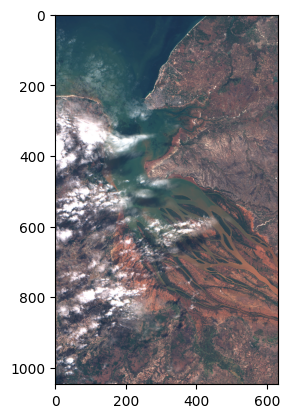

In [2]:
request = make_box_request(TRUECOLOR, area_coordinates = (46.16, -16.15, 46.51, -15.58),
    time_interval =("2020-06-12", "2020-06-13"),
    resolution_m =  60,
)
images = request.get_data()
img = images[0]
plt.imshow(img*3.5/255)

In [3]:
from sentinelhub import SentinelHubRequest
SentinelHubRequest.input_data

<function sentinelhub.api.base_request.SentinelHubBaseApiRequest.input_data(data_collection: 'DataCollection', *, identifier: 'str | None' = None, time_interval: 'RawTimeIntervalType | None' = None, maxcc: 'float | None' = None, mosaicking_order: 'MosaickingOrder | None' = None, upsampling: 'ResamplingType | None' = None, downsampling: 'ResamplingType | None' = None, other_args: 'dict[str, Any] | None' = None) -> 'InputDataDict'>

In [4]:
# a very simple approx
km2deg = 1.0 / 111
x, y = (113.887, -25.43)  # Center point of a query, Madagascar
dx = 80 #km
dy = 50
rx = dx * km2deg
ry = dy*km2deg
bbox = (x - rx, y - ry, x + rx, y + ry)
bbox_km = (x-dx, y-dy, x+dx, y+dy)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


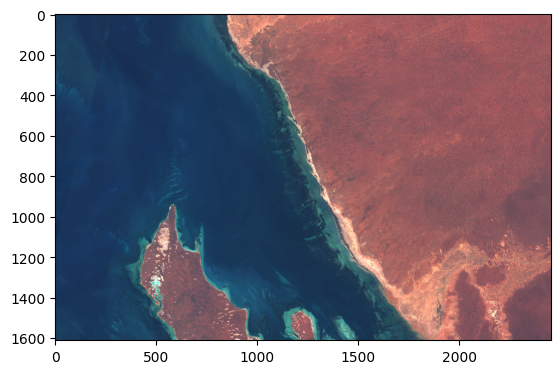

In [10]:
request = make_box_request(TRUECOLOR, area_coordinates = bbox,
    time_interval =("2020-06-04", "2020-08-13"),
    resolution_m =  60,
    max_could_frac = 0.2,
    mosaic_order= MOSAICS['least_cloudy']
)
images = request.get_data()
img = images[0]
plt.imshow(img*3.5/255)

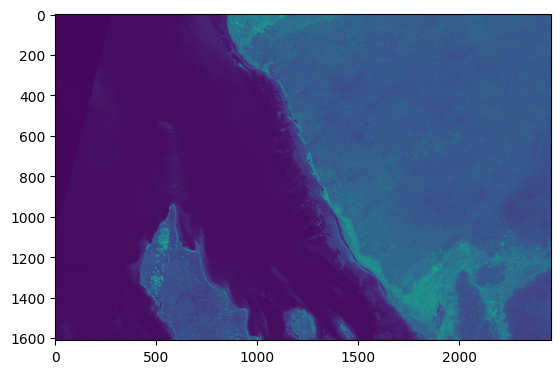

In [6]:
test_script = gen_eval_script(["B11"][::-1])
# pprint(test_script)
request = make_box_request(test_script, area_coordinates = bbox,
    time_interval =("2020-06-04", "2020-06-13"),
    resolution_m =  60,
    max_could_frac = 0.2,
)
images = request.get_data()
img = images[0]
plt.imshow(img[:,:,-1])
